### Langchain in Restaurant Name generation

Indexing: a pipeline for ingesting data from a source and indexing it. This usually happens offline.

Retrieval and generation: the actual RAG chain, which takes the user query at run time and retrieves the relevant data from the index, then passes that to the model.

Indexing involves: 
1. Load: Loading the documents into from the source. This is done in langchain with Document Loaders classes.
2. Split: Splitting the documents into chunks so that it fits into embedding model context window size
3. Embed: converting the chunks into vectors for machine readable format. This is done with an embedding model.
4. Store: Storing the embeddings into a Vector Store DB so that we can index our vectors
5. Retrieve: Given a user input, relevant splits are retrieved from storage using a Retriever.
6. Generate: A LLM produces an answer using a prompt that includes both the question and the retrieved data

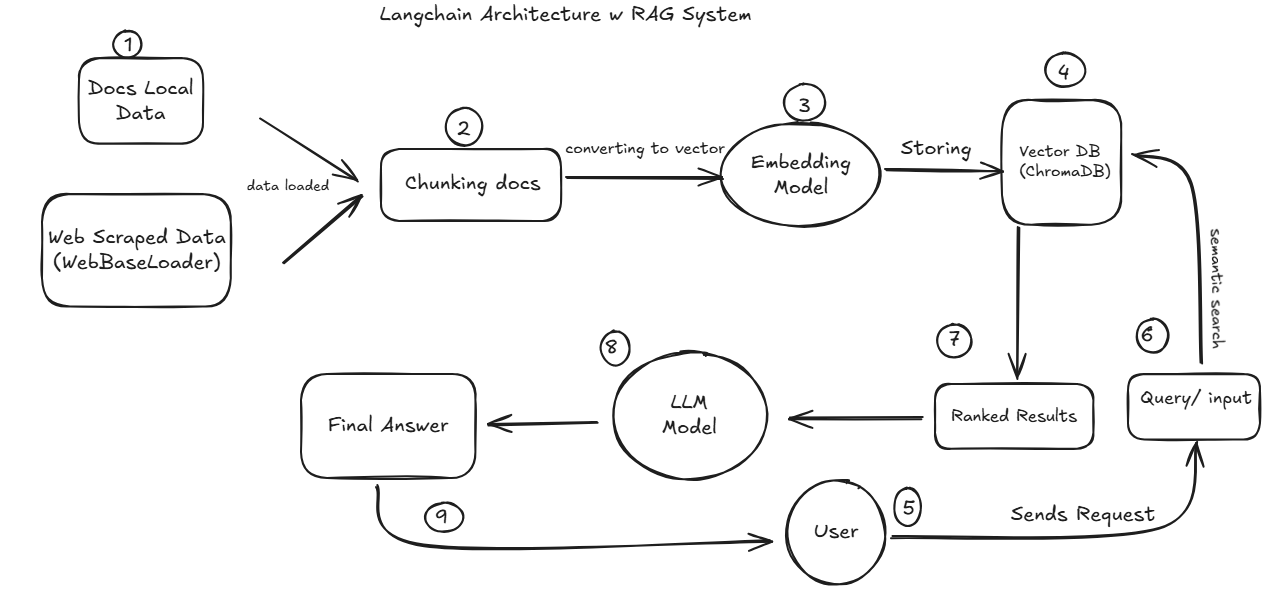

The Project below will use the following tech: Langchain, OpenAI

In [5]:
import os
from dotenv import load_dotenv

load_dotenv()

openai_key = os.getenv("OPENAI_API_KEY")


In [6]:
from langchain.chat_models import init_chat_model  #pip install -U langchain-openai`

OPENAI_MODEL = "gpt-4o-mini"

llm  = init_chat_model(model = OPENAI_MODEL, model_provider="openai")

llm.invoke("Give me 5 places to travel in Europe in summer time")

AIMessage(content='Sure! Here are five fantastic places to visit in Europe during the summer:\n\n1. **Santorini, Greece**: Known for its stunning sunsets, white-washed buildings, and crystal-clear waters, Santorini is a popular summer destination. Enjoy the beaches, explore charming villages, and indulge in delicious Mediterranean cuisine.\n\n2. **Amalfi Coast, Italy**: The Amalfi Coast is renowned for its breathtaking coastal views, picturesque towns like Positano and Ravello, and delicious Italian food. Summer is perfect for sailing, hiking, and enjoying the local beaches.\n\n3. **Barcelona, Spain**: With its vibrant culture, stunning architecture by Antoni Gaudí, and beautiful beaches, Barcelona is a lively summer destination. Don\'t miss Park Güell, La Sagrada Família, and enjoying tapas at local eateries.\n\n4. **Dubrovnik, Croatia**: Often referred to as the "Pearl of the Adriatic," Dubrovnik features magnificent medieval architecture and stunning coastal views. Summer is great f

In [7]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Generate a fancy name for {cuisine} restaurant."

prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template), ("user", "{text}")]
)

prompt = prompt_template.invoke({"cuisine": "Indian", "text": "Hello Germany!"})

prompt